In [45]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def generateEllipse(a,b,centerX,centerY, grid):
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            if ((x-centerX)/a)*((x-centerX)/a) + ((y-centerY)/b)*((y-centerY)/b) <= 1:
                grid[x][y] = 1
    
    return grid

In [41]:
def transitSim(a,b,r, velocity, times):
    starGrid = np.zeros([2*r, 4*b+2*r])
    ellipseGrid = np.zeros([2*r, 4*b+2*r])
    starGrid = generateEllipse(r,r,r, 2*b+r, starGrid)
    ellipseGrid = generateEllipse(a,b,r,3*b+2*r,ellipseGrid)
    planetGrid = np.ones([2*r,4*b+2*r]) - ellipseGrid
    fluxGrid = np.multiply(starGrid,planetGrid)
    initialFlux = np.sum(fluxGrid)
    flux = np.ones(2*r + 2*b)
    
    for i in range(2*r + 2*b):
        planetGrid = np.delete(planetGrid,0,1)
        planetGrid = np.append(planetGrid,np.ones([2*r,1]),1)
        fluxGrid = np.multiply(starGrid,planetGrid)
        percentFlux = np.sum(fluxGrid)/initialFlux
        flux[i] = percentFlux
    
    return flux
    

In [63]:
timeStart = time.time()
flux = transitSim(25,25,100)
timeEnd = time.time()
print(timeEnd - timeStart)

0.19016742706298828


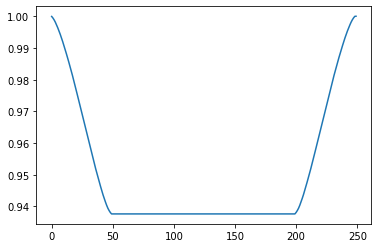

In [64]:
fig = plt.subplot()
fig.plot(flux)
plt.show()